In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from dnn_model_utils import *

/Applications/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
np.random.seed(1)

In [3]:
h5_train = h5py.File('cat-images-dataset/train_catvnoncat.h5','r')

In [4]:
h5_test = h5py.File('cat-images-dataset/test_catvnoncat.h5','r')

In [5]:
train_x_orig, train_y_orig = h5_train['train_set_x'], h5_train['train_set_y']

In [6]:
test_x_orig, test_y_orig = h5_test['test_set_x'], h5_test['test_set_y']

<h4>Converting the h5 dataset to Numpy Array</h4>

In [7]:
def convert_to_numpy(X):
    return np.array(X)

In [8]:
train_x_orig = convert_to_numpy(train_x_orig)
test_x_orig = convert_to_numpy(test_x_orig)
train_y_orig = convert_to_numpy(train_y_orig)
test_y_orig = convert_to_numpy(test_y_orig)

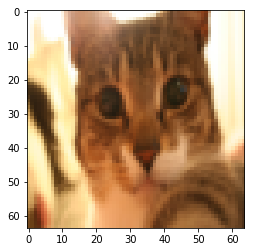

In [9]:
plt.imshow(test_x_orig[11])

In [10]:
#Reshaping train_y_orig and test_y_orig

train_y_orig = train_y_orig.reshape(1,train_y_orig.shape[0])
test_y_orig = test_y_orig.reshape(1,test_y_orig.shape[0])

In [11]:
# Details about the Dataset
m_train = train_x_orig.shape[0] # Number of training examples
num_px = train_x_orig.shape[1] # size of feature column
m_test = test_x_orig.shape[0]

In [12]:
print("Number of training examples ", str(m_train))
print("Number of test examples ", str(m_test))
print("Each image is of size (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_x_orig.shape", train_x_orig.shape)
print("train_y_orig.shape", train_y_orig.shape)
print("test_x_orig.shape", test_x_orig.shape)
print("test_y_orig.shape", test_y_orig.shape)

Number of training examples  209
Number of test examples  50
Each image is of size (64, 64, 3)
train_x_orig.shape (209, 64, 64, 3)
train_y_orig.shape (1, 209)
test_x_orig.shape (50, 64, 64, 3)
test_y_orig.shape (1, 50)


Reshaping the Training and Test Examples --- <strong>Flattening the Image</strong>

In [13]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
# the '-1' makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

In [14]:
train_x_flatten.shape

(12288, 209)

<strong>Standardize data to have feature values between 0 - 1 </strong>

In [15]:
train_x = train_x_flatten / 255
test_x = test_x_flatten / 255

In [16]:
print("train_x's shape : " + str(train_x.shape))
print("train_y's shape : " + str(test_x.shape))

train_x's shape : (12288, 209)
train_y's shape : (12288, 50)


In [17]:
import numpy as np

In [18]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations = 3000, print_cost=False):
    
    """
    Implements a L-layer neural network: [LINEAR->RELU]*[L-1]-> LINEAR->SIGMOID
    
    Arguments:
    X --- data, numpy array of shape (n_x, number of examples)
    Y --- true "label" vector ( containing 1 if cat otherwise 0 if not-cat), of shape (1, number of examples)
    layers_dims --- dimesnsions of the layers 
    learning_rate --- learning rate of the gradient descent update rule
    print_cost --- if set to True, this will print the cost every 100 iterations
    
    Returns:
    
    parameters --- A Dictionary containing Weights matrix as well as Bias vectors of all the layers
    
    """
    
    grads = {}
    costs = []
    np.random.seed(1)
    
    m = X.shape[1]
  
    
    #Initialize parameters dictionary
    parameters = initialize_parameters(layers_dims)
    
    for i in range(0, num_iterations):
        # Forward Propogation [LINEAR -> RELU] * [L-1] -> LINEAR -> SIGMOID
        AL, caches = L_model_forward(X, parameters)
        
        #Compute cost 
        cost = compute_cost(AL, Y)
        
        #Backward Proppogation 
        grads = L_model_backward(AL, Y, caches)
        
        #Update Parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        #Print cost after every 100 iterations
        if print_cost and i %100 == 0:
            print("Cost after iteration %i : %f" %(i,cost))
        if print_cost and i%100 == 0:
            costs.append(cost)
            
    #plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
        
    return parameters
        

Cost after iteration 0 : 0.694811
Cost after iteration 100 : 0.662157
Cost after iteration 200 : 0.645496
Cost after iteration 300 : 0.634488
Cost after iteration 400 : 0.601635
Cost after iteration 500 : 0.558767
Cost after iteration 600 : 0.513919
Cost after iteration 700 : 0.473652
Cost after iteration 800 : 0.506297
Cost after iteration 900 : 0.485062
Cost after iteration 1000 : 0.447633
Cost after iteration 1100 : 0.443584
Cost after iteration 1200 : 0.425220
Cost after iteration 1300 : 0.440789
Cost after iteration 1400 : 0.442636
Cost after iteration 1500 : 0.393858
Cost after iteration 1600 : 0.331222
Cost after iteration 1700 : 0.309201
Cost after iteration 1800 : 0.267187
Cost after iteration 1900 : 0.250909
Cost after iteration 2000 : 0.225673
Cost after iteration 2100 : 0.233465
Cost after iteration 2200 : 0.199011
Cost after iteration 2300 : 0.180584
Cost after iteration 2400 : 0.139199
Cost after iteration 2500 : 0.105950
Cost after iteration 2600 : 0.119626
Cost after it

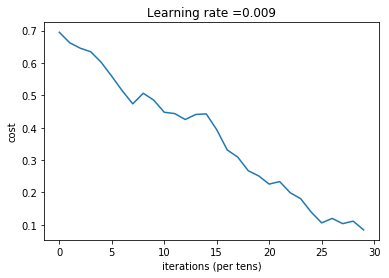

In [21]:
parameters = L_layer_model(train_x, train_y_orig, (12288,2,1), learning_rate=0.0090, num_iterations = 3000, print_cost = True)

In [ ]:
parameters_for_5layerNN = L_layer_model(train_x, train_y_orig, (12288,1024,512,64,1), learning_rate=0.0075, num_iterations = 2500, print_cost = True)

Cost after iteration 0 : 0.693328
Cost after iteration 100 : 0.676963
Cost after iteration 200 : 0.665920
Cost after iteration 300 : 0.658222
Cost after iteration 400 : 0.652869
Cost after iteration 500 : 0.649238
Cost after iteration 600 : 0.646874
Cost after iteration 700 : 0.645390
Cost after iteration 800 : 0.644458
Cost after iteration 900 : 0.643833
Cost after iteration 1000 : 0.643340
Cost after iteration 1100 : 0.642885
Cost after iteration 1200 : 0.642411
Cost after iteration 1300 : 0.641876
Cost after iteration 1400 : 0.641257
Cost after iteration 1500 : 0.640512
Cost after iteration 1600 : 0.639584


<strong>For Prediction over 1 Test Example</strong> 

In [30]:
# Unusual way of extracting one test example --> I know :)

In [22]:
test_x_1 = test_x.T[1].T
test_x_1 = test_x_1.reshape(12288,1)
test_x_1.shape

(12288, 1)

In [23]:
def predict_for_single_example(test_x_1, parameters):
    AL, caches = L_model_forward(test_x_1, parameters)
    if np.squeeze(AL) >= 0.5 :
        return 1
    else:
        return 0
        
    

In [26]:
output = predict_for_single_example(test_x_1, parameters)

In [27]:
output

In [28]:
#Verifying with the Original Example 

In [29]:
test_y_orig.T[1].T

array([1])

A lot can be done after that -- 
like taking prediction over entire test set 
than calculating the test set error, 
accuracy over entire training and test set 
checking for bias and variance 
calculating the F1 score, that I am leaving for Now, May be I will try to cover some of them in my other tutorials.
Signing off Now, will catch up in other tuts , bye  ;) 